In [3]:
tf.keras.backend.clear_session()

In [2]:
import tensorflow as tf

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import os
import cv2
from sklearn.utils import shuffle
from random import randint

In [4]:
# def get_img(x):
#     for labels in x:
#         if labels=='Manipuri':
#             label=1
#         elif labels=='Bharatanatyam':
#             label=2
#         elif labels=='Odissi':
#             label=3
#         elif labels=='Kathakali':
#             label=4
#         elif labels=='Kathak':
#             label=5
#         elif labels=='Sattriya':
#             label=6
#         elif labels=='Kuchipudi':
#             label=7
#         elif labels=='Mohiniyattam':
#             label=8

In [6]:
train=pd.read_csv('C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\train.csv')

In [7]:
test=pd.read_csv('C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\test.csv')

In [8]:
train.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [9]:
test.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [10]:
print(train['target'].unique())


['manipuri' 'bharatanatyam' 'odissi' 'kathakali' 'kathak' 'sattriya'
 'kuchipudi' 'mohiniyattam']


In [11]:
class_map={'manipuri':0 ,'bharatanatyam':1, 'odissi':2, 'kathakali':3, 'kathak':4, 'sattriya':5,'kuchipudi':6,'mohiniyattam':7}
inverse_map={0:'manipuri' ,1:'bharatanatyam' ,2:'odissi',3:'kathakali',4:'kathak',5:'sattriya',6:'kuchipudi' ,7:'mohiniyattam'}

In [12]:
train['target']=train['target'].map(class_map)

In [13]:
train.head()

,Image,target
0,96.jpg,0
1,163.jpg,1
2,450.jpg,2
3,219.jpg,3
4,455.jpg,2


In [27]:
def get_images(directory,x):
    Images=[]
    Labels=[]
    label=0
    if (x=='train'):
        for image_file in os.listdir(directory):
            image=cv2.imread(directory+r'\\'+image_file)
            image=cv2.resize(image,(250,250))
            image=image.astype('float32')
            Images.append(image)
            Labels.append(train['target'][label])
            label=label+1
        return (Images,Labels)
    else:
        for image_file in os.listdir(directory):
            image=cv2.imread(directory+r'\\'+image_file)
            image=cv2.resize(image,(250,250))
            image=image.astype('float32')
            Images.append(image)
        return (Images)
    

In [28]:
Images,Labels=get_images('C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\train','train')

In [29]:
Images_test=get_images('C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\test','test')

In [30]:
len(Images_test)

156

In [31]:
len(Labels)

364

In [32]:
len(train)

364

In [33]:
train.head()

,Image,target
0,96.jpg,0
1,163.jpg,1
2,450.jpg,2
3,219.jpg,3
4,455.jpg,2


In [34]:
Labels

[0,
 1,
 2,
 3,
 2,
 4,
 5,
 6,
 5,
 6,
 6,
 6,
 4,
 5,
 3,
 2,
 5,
 6,
 0,
 4,
 0,
 1,
 6,
 6,
 7,
 2,
 4,
 2,
 2,
 5,
 3,
 4,
 3,
 5,
 1,
 4,
 1,
 3,
 2,
 2,
 2,
 6,
 0,
 7,
 7,
 2,
 4,
 0,
 4,
 7,
 2,
 5,
 5,
 2,
 6,
 5,
 7,
 0,
 5,
 4,
 2,
 5,
 0,
 3,
 5,
 3,
 0,
 1,
 4,
 4,
 5,
 1,
 3,
 4,
 7,
 0,
 4,
 6,
 2,
 6,
 1,
 6,
 1,
 5,
 4,
 6,
 7,
 0,
 7,
 1,
 2,
 6,
 2,
 6,
 1,
 7,
 1,
 1,
 5,
 4,
 3,
 7,
 5,
 1,
 2,
 4,
 5,
 5,
 6,
 2,
 4,
 0,
 3,
 1,
 7,
 3,
 6,
 0,
 7,
 1,
 7,
 4,
 3,
 6,
 1,
 7,
 1,
 7,
 3,
 1,
 7,
 1,
 0,
 0,
 5,
 7,
 5,
 1,
 2,
 7,
 2,
 7,
 3,
 2,
 5,
 1,
 7,
 2,
 5,
 0,
 5,
 5,
 4,
 2,
 3,
 1,
 7,
 4,
 6,
 0,
 5,
 3,
 7,
 3,
 4,
 5,
 7,
 1,
 1,
 6,
 2,
 4,
 2,
 6,
 7,
 6,
 2,
 5,
 1,
 1,
 3,
 2,
 7,
 0,
 2,
 3,
 7,
 7,
 6,
 4,
 7,
 0,
 2,
 2,
 6,
 3,
 1,
 3,
 7,
 1,
 3,
 7,
 2,
 0,
 6,
 1,
 5,
 6,
 3,
 7,
 3,
 5,
 7,
 4,
 6,
 7,
 6,
 5,
 7,
 4,
 7,
 5,
 2,
 4,
 4,
 3,
 7,
 7,
 5,
 4,
 1,
 4,
 0,
 3,
 5,
 0,
 6,
 0,
 4,
 1,
 4,
 6,
 3,
 3,
 2,
 6,
 1,
 3,
 6,
 3,


In [43]:
# for i in range(len(Labels)):
#     for index,row in x.iterrows():
#         if(Labels[i]==row["Image"]):
#             Labels[i]=row["target"]

    
    

In [44]:
# def get_classlabel(x):
#     for i in x:
#         if i=='Manipuri':
            
#         ,2:'Bharatanatyam',3:'Odissi',4:'Kathakali',5:'Kathak',6:'Sattriya',7:'Kuchipudi',8:'Mohiniyattam'}
    
#     return labels[class_code]

In [45]:
# for i in range(len(Labels)):
#     if(Labels[i]=='manipuri'):
#         Labels[i]=int(0)
#     elif(Labels[i]=='bharatanatyam'):
#         Labels[i]=int(1)
#     elif(Labels[i]=='odissi'):
#         Labels[i]=int(2)
#     elif(Labels[i]=='kathakali'):
#         Labels[i]=int(3)
#     elif(Labels[i]=='kathak'):
#         Labels[i]=int(4)
#     elif(Labels[i]=='sattriya'):
#         Labels[i]=int(5)
#     elif(Labels[i]=='kuchipudi'):
#         Labels[i]=int(6)
#     elif(Labels[i]=='mohiniyattam'):
#         Labels[i]=int(7)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(Images, Labels, test_size=0.30, shuffle= True)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array
train_datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,# divide each input by its std
        rescale=1./255,
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

test_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)
train_datagen.fit(x_train)
test_datagen.fit(Images_test)
valid_datagen.fit(x_valid)

In [39]:
train_img=np.array(Images)
x_train= np.array(x_train)
x_valid= np.array(x_valid)
y_train= np.array(y_train)
y_valid= np.array(y_valid)
test_img=np.array(Images_test)
train_label=np.array(Labels)
print("Shape of training data=",x_train.shape," and shape of labels of training data= ",y_train.shape)
print("Shape of validation data=",x_valid.shape," and shape of labels of validation data= ",y_valid.shape)
print("Shape of test data=",test_img.shape)

Shape of training data= (254, 250, 250, 3)  and shape of labels of training data=  (254,)
Shape of validation data= (110, 250, 250, 3)  and shape of labels of validation data=  (110,)
Shape of test data= (156, 250, 250, 3)


In [40]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import Dropout


In [43]:
base_model=InceptionResNetV2(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(250,250,3),
    pooling='avg')

In [44]:
base_model.trainable=False
    
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 124, 124, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 124, 124, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 124, 124, 32) 0           batch_normalization_203[0][0]    
________________________________________________________________________________

__________________________________________________________________________________________________
block8_10_mixed (Concatenate)   (None, 6, 6, 448)    0           activation_402[0][0]             
                                                                 activation_405[0][0]             
__________________________________________________________________________________________________
block8_10_conv (Conv2D)         (None, 6, 6, 2080)   933920      block8_10_mixed[0][0]            
__________________________________________________________________________________________________
block8_10 (Lambda)              (None, 6, 6, 2080)   0           block8_9_ac[0][0]                
                                                                 block8_10_conv[0][0]             
__________________________________________________________________________________________________
conv_7b (Conv2D)                (None, 6, 6, 1536)   3194880     block8_10[0][0]                  
__________

In [45]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())

model.add(Dense(8,activation='softmax'))


from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop


#NASnet.trainable=False

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]
    


model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()


Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 1536)              54336736  
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1536)              0         
_________________________________________________________________
batch_normalization_406 (Bat (None, 1536)              6144      
_________________________________________________________________
dense (Dense)                (None, 512)               786944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_407 (Bat (None, 512)               2

In [46]:
model.fit(train_datagen.flow(x_train, to_categorical(y_train,8), batch_size=32),
                    epochs=10,
          callbacks=callbacks,
          validation_data= valid_datagen.flow(x_valid, to_categorical(y_valid,8), batch_size=32),
          verbose=1
             )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 4 steps
Epoch 1/10
8/8 [==============================] - 176s 22s/step - loss: 2.8454 - accuracy: 0.1457 - val_loss: 2.3307 - val_accuracy: 0.1000
Epoch 2/10
8/8 [==============================] - 147s 18s/step - loss: 2.6023 - accuracy: 0.2244 - val_loss: 2.5389 - val_accuracy: 0.1182
Epoch 3/10
8/8 [==============================] - 134s 17s/step - loss: 2.3288 - accuracy: 0.2795 - val_loss: 2.8408 - val_accuracy: 0.1182
Epoch 4/10
8/8 [==============================] - 135s 17s/step - loss: 2.2815 - accuracy: 0.2362 - val_loss: 3.1700 - val_accuracy: 0.1182
Epoch 5/10
8/8 [==============================] - 135s 17s/step - loss: 2.1986 - accuracy: 0.3031 - val_loss: 3.3696 - val_accuracy: 0.1182
Epoch 6/10
8/8 [==============================] - 136s 17s/step - loss: 2.1389 - accuracy: 0.3307 - val_loss: 3.4559 - val_accuracy: 0.1182
Epoch 7/10
8/8 [==============================] - 135s 17s/step - loss

In [47]:
from tensorflow.keras.applications.resnet import ResNet50

In [48]:
base_model_2= ResNet50(include_top=False, weights='imagenet',input_shape=(250,250,3), pooling='max')

'''for layer in base_model_2.layers[:-3]:
    layer.trainable=False'''
base_model_2.trainable=False
    
model_2=Sequential()
model_2.add(base_model_2)
model_2.add(Flatten())
model_2.add(Dropout(0.4))
model_2.add(BatchNormalization())

model_2.add(Dense(768, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(BatchNormalization())

model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(BatchNormalization())


model_2.add(Dense(8,activation='softmax'))

model_2.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_2.summary()

94773248/94765736 [==============================] - 187s 2us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_408 (Bat (None, 2048)              8192      
_________________________________________________________________
dense_2 (Dense)              (None, 768)               1573632   
_________________________________________________________________
dropout_3 (Dropout)          (None, 768)               0         
_____________________________________________________

In [49]:
model_2.fit(train_datagen.flow(x_train, to_categorical(y_train,8), batch_size=32),
                    epochs=10,
          callbacks=callbacks,
          validation_data= valid_datagen.flow(x_valid, to_categorical(y_valid,8), batch_size=32),
          verbose=1
             )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 4 steps
Epoch 1/10
8/8 [==============================] - 195s 24s/step - loss: 2.8502 - accuracy: 0.1024 - val_loss: 2.3776 - val_accuracy: 0.1091
Epoch 2/10
8/8 [==============================] - 175s 22s/step - loss: 2.3330 - accuracy: 0.2205 - val_loss: 2.2974 - val_accuracy: 0.1091
Epoch 3/10
8/8 [==============================] - 180s 23s/step - loss: 2.1762 - accuracy: 0.2205 - val_loss: 2.3691 - val_accuracy: 0.1091
Epoch 4/10
8/8 [==============================] - 175s 22s/step - loss: 2.0460 - accuracy: 0.2913 - val_loss: 2.3775 - val_accuracy: 0.1273
Epoch 5/10
8/8 [==============================] - 177s 22s/step - loss: 1.8641 - accuracy: 0.3583 - val_loss: 2.3782 - val_accuracy: 0.1273
Epoch 6/10
8/8 [==============================] - 179s 22s/step - loss: 1.9149 - accuracy: 0.3228 - val_loss: 2.2458 - val_accuracy: 0.1273
Epoch 7/10
8/8 [==============================] - 177s 22s/step - loss

In [50]:
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input
base_model_3=VGG19(include_top=False, weights='imagenet',input_shape=(250,250,3), pooling='max')

for layer in base_model_3.layers[:-4]:
    layer.trainable=False
#base_model_3.trainable=False
    
model_3=Sequential()
model_3.add(base_model_3)
model_3.add(Flatten())

model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))


model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())


model_3.add(Dense(64, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))



model_3.add(Dense(8,activation='softmax'))

model_3.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_3.summary()

80142336/80134624 [==============================] - 105s 1us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 512)               20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
batch_normalization_411 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_412 (Bat (None, 256)               1024      
_____________________________________________________

In [51]:
model_3.fit(train_datagen.flow(x_train, to_categorical(y_train,8), batch_size=32),
                    epochs=20,
          callbacks=callbacks,
          validation_data= valid_datagen.flow(x_valid, to_categorical(y_valid,8), batch_size=32),
          verbose=1
             )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 4 steps
Epoch 1/20
8/8 [==============================] - 255s 32s/step - loss: 2.9158 - accuracy: 0.1220 - val_loss: 3.3488 - val_accuracy: 0.0818
Epoch 2/20
8/8 [==============================] - 231s 29s/step - loss: 2.4246 - accuracy: 0.2008 - val_loss: 4.5912 - val_accuracy: 0.0818
Epoch 3/20
8/8 [==============================] - 237s 30s/step - loss: 2.1009 - accuracy: 0.2874 - val_loss: 7.1339 - val_accuracy: 0.1000
Epoch 4/20
8/8 [==============================] - 229s 29s/step - loss: 2.1687 - accuracy: 0.2244 - val_loss: 7.2595 - val_accuracy: 0.1000
Epoch 5/20
7/8 [=========================>....] - ETA: 19s - loss: 2.1308 - accuracy: 0.2658
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
8/8 [==============================] - 3288s 411s/step - loss: 2.1495 - accuracy: 0.2520 - val_loss: 6.8619 - val_accuracy: 0.0818
Epoch 6/20
8/8 [=============================

In [81]:
print("Shape of Images:",Images[0].shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (250, 250, 3)
Shape of Labels: (364,)


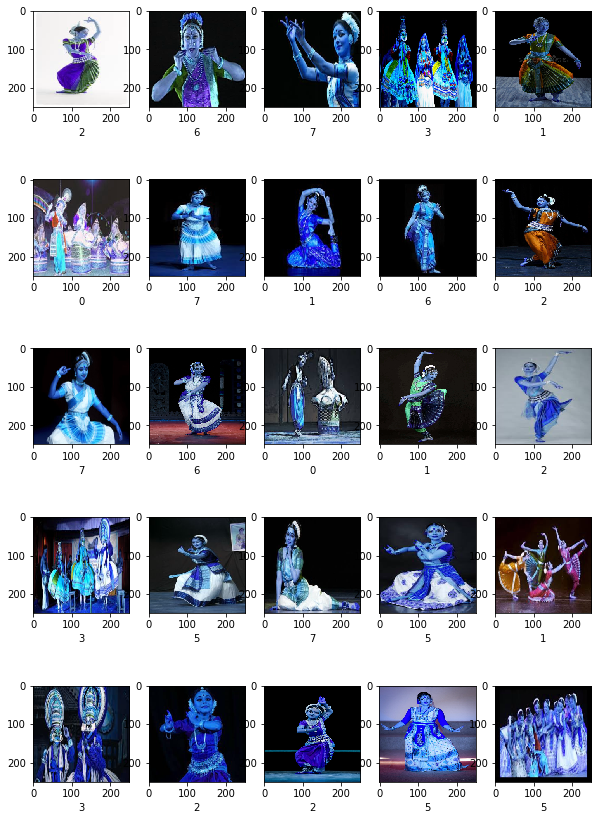

In [82]:
plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    rnd_number = randint(0,len(Images))
    plt.imshow(Images[rnd_number])
    plt.xlabel(Labels[rnd_number])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [ ]:
img_x,Label_x,img_y,Label_y = train_test_split(Images,Labels, test_size=0.1, random_state=1)

In [13]:
# train, valid = train_test_split(train, test_size=0.1, random_state=1)
# train.shape

(327, 2)

In [14]:
train.shape

(327, 2)

In [15]:
valid.shape

(37, 2)

In [14]:
# Img,Y_train=get_images('C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\train',train)
# Img1,y_test=get_images('C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\train',valid)



In [84]:
train.head()

,Image,target
90,516.jpg,odissi
89,122.jpg,bharatanatyam
260,339.jpg,sattriya
117,82.jpg,manipuri
167,133.jpg,bharatanatyam


In [16]:
from keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array

Using TensorFlow backend.


In [34]:
# train_datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     rescale=1/255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     validation_split=0.2
# )
# test_datagen = ImageDataGenerator(
#     rescale=1/255
# )

In [38]:

# train_generator = train_datagen.flow_from_dataframe(
#             dataframe=train, directory="C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\train", 
#             x_col="Image", y_col= "target", 
#             class_mode="categorical", target_size=(250,250), 
#             batch_size= 32)
            
# valid_generator = train_datagen.flow_from_dataframe(
#             dataframe=valid, directory="C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\train", 
#             x_col="Image", y_col= "target", 
#             class_mode="categorical", target_size=(250,250), 
#             batch_size=32)  


Found 327 validated image filenames belonging to 8 classes.
Found 37 validated image filenames belonging to 8 classes.


In [21]:
train_generator

In [83]:
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import optimizers
from keras.optimizers import RMSprop

In [31]:
# model = tf.keras.models.Sequential()
# # visible = input_shape=(250,250,3)
# model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(250,250,3)))
# model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Dropout(0.25))





# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1)))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same',strides=(1, 1)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1)))
# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same',strides=(1, 1)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3)))
# model.add(tf.keras.layers.Dropout(0.25))

# # model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', 
# #                  input_shape=Images[0].shape))
# # model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
# # model.add(tf.keras.layers.BatchNormalization())
# # model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3)))
# # model.add(tf.keras.layers.Dropout(0.25))

# # model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same',strides=(1, 1), 
# #                  input_shape=Images[0].shape))
# # model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same',strides=(1, 1)))
# # model.add(tf.keras.layers.BatchNormalization())
# # model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
# # model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Dense(8, activation='softmax'))
# # early_stop=[EarlyStopping(monitor='val_loss',restore_best_weights=True,patience=3)]
# opt = tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer=opt, 
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # model.compile(loss='sparse_categorical_crossentropy', 
# #               optimizer=tf.keras.optimizers.Adam(0.0001), 
# #               metrics=['accuracy'])

In [65]:
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', 
#                  input_shape=Images[0].shape))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', 
#                  input_shape=Images[0].shape))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3)))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', 
#                  input_shape=Images[0].shape))
# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(5, 5)))
# model.add(tf.keras.layers.Dropout(0.25))


# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.25))

# model.add(tf.keras.layers.Dense(8, activation='softmax'))

# model.compile(loss='sparse_categorical_crossentropy', 
#               optimizer=tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True), 
#               metrics=['accuracy'])

In [88]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=Images.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [89]:
from keras.utils.vis_utils import model_to_dot


from IPython.display import SVG

In [90]:
from IPython.display import SVG
model.summary()
SVG(model_to_dot(model).create(prog='dot',format='svg'))
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 246, 246, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 121, 121, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)              

AttributeError: module 'os' has no attribute 'errno'

In [69]:
# batch_size=32
# r=model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator.filenames) // batch_size,
#     epochs=20,
#     validation_data=valid_generator,
#     validation_steps=len(valid_generator.filenames) // batch_size,
# #     class_weight=class_weights,
#     callbacks=[EarlyStopping(patience=3, monitor='val_loss',restore_best_weights=True)]
    
# )

In [91]:
# r = model.fit(Images,Labels,epochs=30,validation_split=0.10, callbacks=[EarlyStopping(patience=3, monitor='val_loss',restore_best_weights=True)]
#               )
r = model.fit(Images,Labels,epochs=25,validation_split=0.20,callbacks=[EarlyStopping(patience=5, monitor='val_loss',restore_best_weights=True)])


Train on 291 samples, validate on 73 samples
Epoch 1/25
128/291 [============>.................] - ETA: 20:10 - loss: 1386.7706 - accuracy: 0.1719

F:\ANACONDARAJ\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (11.511097). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


291/291 [==============================] - 1036s 4s/step - loss: 905.4599 - accuracy: 0.1478 - val_loss: 28.8213 - val_accuracy: 0.3973
Epoch 2/25
291/291 [==============================] - 46s 159ms/step - loss: 28.7975 - accuracy: 0.2268 - val_loss: 15.1347 - val_accuracy: 0.0411
Epoch 3/25
291/291 [==============================] - 43s 146ms/step - loss: 4.2700 - accuracy: 0.2715 - val_loss: 5.0750 - val_accuracy: 0.0274
Epoch 4/25
291/291 [==============================] - 43s 147ms/step - loss: 2.1096 - accuracy: 0.3127 - val_loss: 2.4564 - val_accuracy: 0.1096
Epoch 5/25
291/291 [==============================] - 43s 148ms/step - loss: 1.2838 - accuracy: 0.5704 - val_loss: 2.7083 - val_accuracy: 0.0411
Epoch 6/25
291/291 [==============================] - 43s 147ms/step - loss: 0.6588 - accuracy: 0.7973 - val_loss: 3.0429 - val_accuracy: 0.1370
Epoch 7/25
291/291 [==============================] - 43s 149ms/step - loss: 0.3891 - accuracy: 0.8694 - val_loss: 3.0381 - val_accuracy:

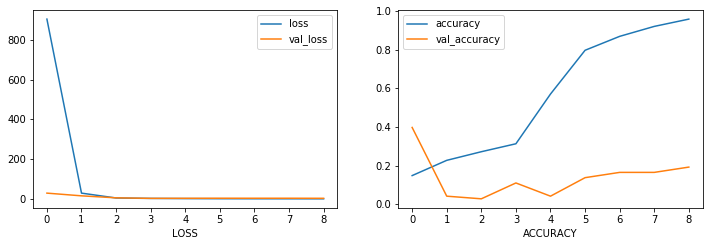

In [92]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel('LOSS')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.xlabel('ACCURACY')
plt.legend()

In [56]:
# test_images,test_labels = get_images('C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\test',test)
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)
# model.evaluate(test_images,test_labels, verbose=1)

In [93]:
model.save('model.h5')

In [ ]:
model.predict_classes

In [94]:

import cv2

import numpy as np

model = tf.keras.models.load_model('model.h5')

model.compile(loss='binary_crossentropy',

              optimizer=tf.keras.optimizers.RMSprop(0.0001),

              metrics=['accuracy'])
 
classes=[]
directory='C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\test'
for image_file in os.listdir(directory):
        image=cv2.imread(directory+r'\\'+image_file)
        image=cv2.resize(image,(250,250))
        image = np.reshape(image,[1,250,250,3])
        x=model.predict_classes(image)

        if(x==0):
             x='manipuri'
        elif(x==1):
             x='bharatanatyam'
        elif(x==2):
             x='odissi'
        elif(x==3):
            x='kathakali'
        elif(x==4):
             x='kathak'
        elif(x==5):
             x='sattriya'
        elif(x==6):
             x='kuchipudi'
        elif(x==7):
             x='mohiniyattam' 
        classes.append(x)



In [54]:
test.head()

,Image,target
0,508.jpg,odissi
1,246.jpg,odissi
2,473.jpg,odissi
3,485.jpg,odissi
4,128.jpg,odissi


In [55]:
len(test)

156

In [95]:
len(classes)

156

In [96]:
test['target']=classes

In [97]:
type(test)

pandas.core.frame.DataFrame

In [98]:
test.to_csv('C:\\Users\\User\\Documents\\0664343c9a8f11ea\\dataset\\submission.csv',index=False)